# Advanced Multivariate Statistics
# Lecture 3 - Clustering Review and Model Based Clustering

![clustering-families](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

In [ ]:
from sklearn import set_config
set_config(display='diagram')

# The data

![palmer-penguins](https://camo.githubusercontent.com/1d187452ac3929cfde8f5760b79f37cc117c1a332227d37a8c50db50d3db632a/68747470733a2f2f616c6c69736f6e686f7273742e6769746875622e696f2f70616c6d657270656e6775696e732f7265666572656e63652f666967757265732f6c7465725f70656e6775696e732e706e67)

In [ ]:
import pandas as pd

penguins_raw = (
    pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")
        .dropna()
)

penguins_raw.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [ ]:
penguins_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


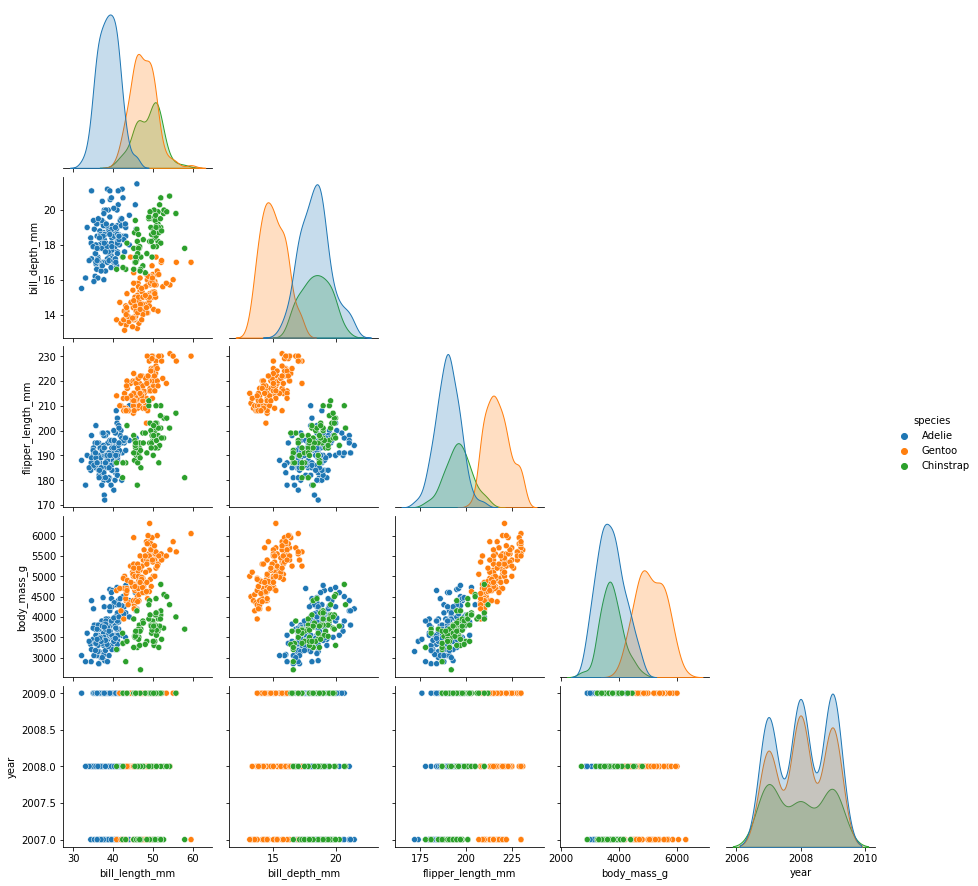

In [ ]:
import seaborn as sns

species_pairplot = sns.pairplot(
    data=penguins_raw,
    hue="species",
    corner=True
)

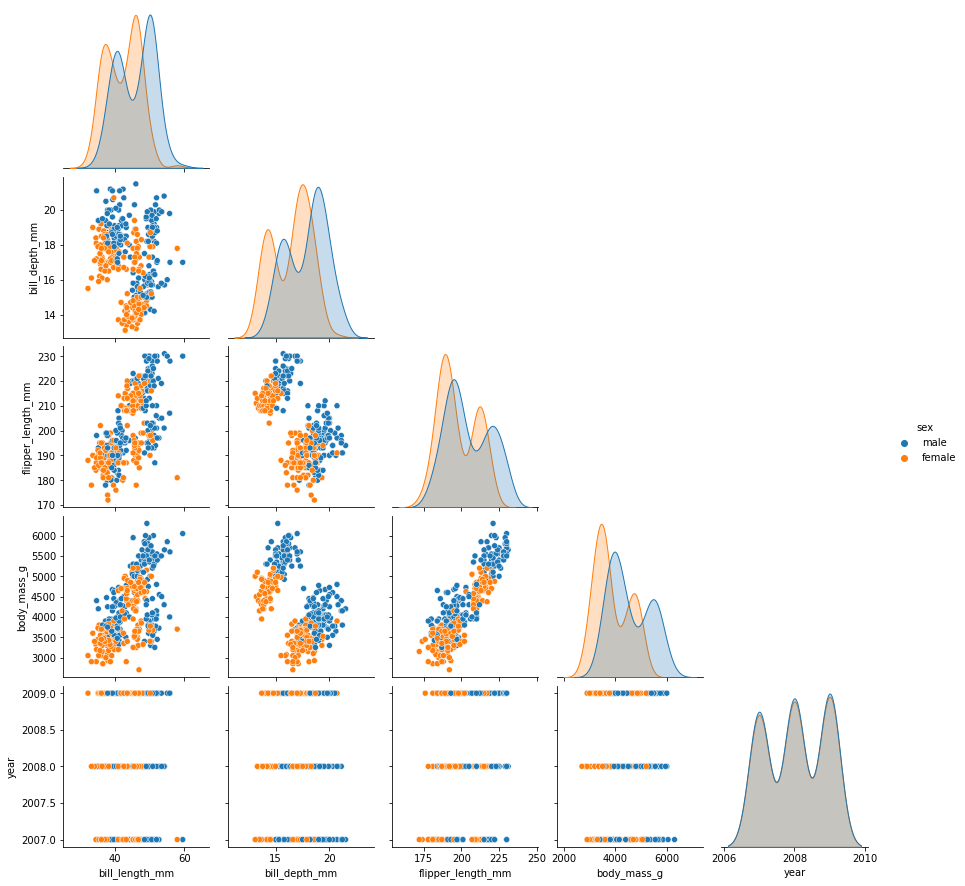

In [ ]:
sex_pairplot = sns.pairplot(
    data=penguins_raw,
    hue="sex",
    corner=True
)

In [ ]:
penguins = pd.get_dummies(
    penguins_raw.drop("species", axis=1),
    columns=["sex", "island"],
    drop_first=True
)

penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,sex_male,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,2007,1,0,1
1,39.5,17.4,186.0,3800.0,2007,0,0,1
2,40.3,18.0,195.0,3250.0,2007,0,0,1
4,36.7,19.3,193.0,3450.0,2007,0,0,1
5,39.3,20.6,190.0,3650.0,2007,1,0,1


# Pros and Cons of KMeans clustering:

`+` fastest algorithm

`+` works with largest amounts of data and medium number of clusters

`-` assumes evenly shaped and evenly distributed (variance) clusters

`-` distance based-clustering: requires scaling.

`-` cannot work with categorical features: no ordinal encoding because cardinality cannot be interpreted (i.e. we cannot interpret the "distance"between two or more classes).

`-` no categorical encoding either, because the algorithm suffers from the *curse of dimensionality*:

> [...] in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations. [*source*](https://scikit-learn.org/stable/modules/clustering.html#k-means)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans

kmeans_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("kmeans", KMeans(random_state=42, n_clusters=5))
    ]
)

kmeans_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=5, random_state=42))])

In [ ]:
_ = kmeans_pipeline.fit(penguins)

We have to use indexing because we are accessing the `inertia_` attribute of the fitted model (not the pipeline):

In [ ]:
kmeans_pipeline[1].inertia_

910.8812354354343

In [ ]:
kmeans_pipeline[1].labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 2, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 4, 1, 4, 4, 1, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 4, 1, 4, 4,
       1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 4, 1,
       1, 4, 1, 4, 1, 4, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1,
       4, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0,

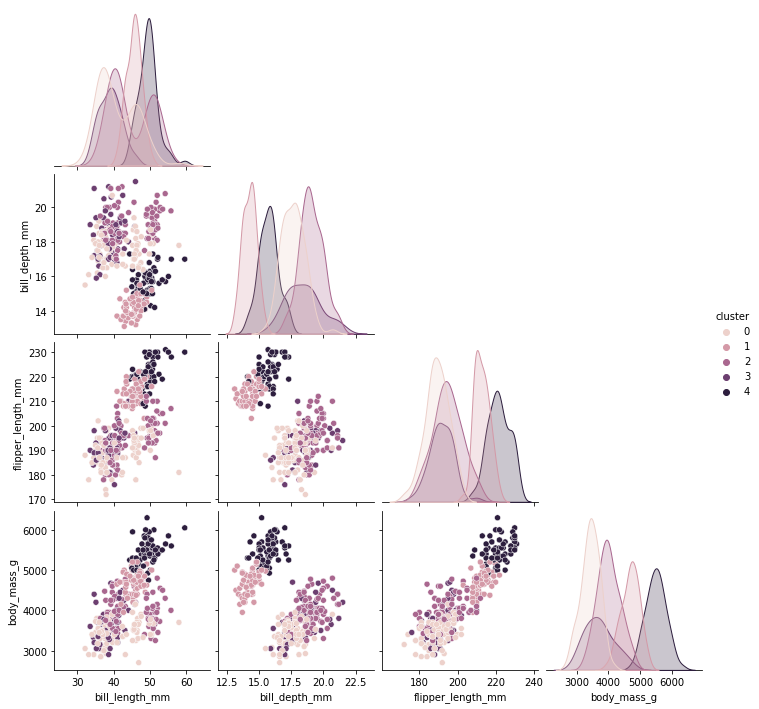

In [ ]:
from __future__ import annotations

import matplotlib.pyplot as plt

def plot_clusters(
    *,
    preds: np.ndarray,
    data: pd.DataFrame = penguins,
    cols: list[str] = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],
    ) -> plt.Figure:
    return (
        data
            .filter(cols)
            .assign(cluster = preds)
            .pipe(
                sns.pairplot,
                hue="cluster",
                corner=True
            )
        )
    
_ = plot_clusters(preds = kmeans_pipeline[1].labels_)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_clusters_range(max_clusters):
    return np.arange(2, max_clusters + 1, dtype=np.int8)
    

def compute_inertia(data, max_clusters, random_state=42):
    
    clusters_inertia = []
    
    # conviene normalizzare i dati fuori dalla pipeline
    # per non doverlo fare ogni volta durante il loop
    scaled_data = StandardScaler().fit_transform(data)
    
    for cluster in make_clusters_range(max_clusters):
        
        kmeans = KMeans(random_state=random_state, n_clusters=cluster)
        _ = kmeans.fit(scaled_data)
        
        clusters_inertia.append(kmeans.inertia_)
        
    return np.array(clusters_inertia)


def plot_inertia(inertia, max_clusters):
    
    cluster_range = make_clusters_range(max_clusters)
    
    fig, ax = plt.subplots(figsize=(12,8))

    ax.plot(cluster_range, inertia)
    ax.scatter(cluster_range, inertia)
    
    ax.set(title=f"Inertia for {max_clusters} clusters (lower is better)", xticks=cluster_range)
    
    plt.show()


def inertia_pipeline(data, max_clusters, random_state):
    inertia = compute_inertia(data=data, max_clusters=max_clusters, random_state=random_state)
    
    plot_inertia(inertia, max_clusters)

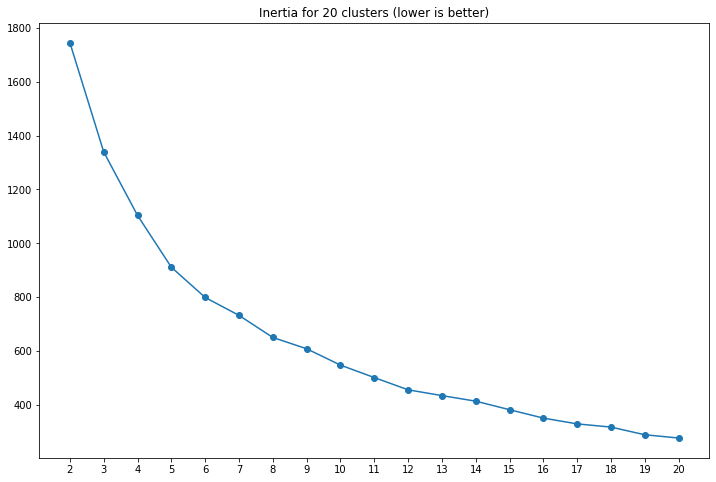

In [ ]:
inertia_pipeline(penguins, max_clusters=20, random_state=42)

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


def compute_cluster_metrics(source_data, num_clusters, random_state):
    kmeans = KMeans(num_clusters, random_state=random_state).fit(source_data)

    inertia = kmeans.inertia_
    davies_bouldin = davies_bouldin_score(source_data, kmeans.labels_)
    silhouette_coefficient = silhouette_score(source_data, kmeans.labels_, metric="euclidean")
    calinski_harabasz = calinski_harabasz_score(source_data, kmeans.labels_)

    return inertia, davies_bouldin, silhouette_coefficient, calinski_harabasz


def compute_metrics(data, max_clusters, random_state):
    scaled_data = StandardScaler().fit_transform(data)

    clusters_range = make_clusters_range(max_clusters)

    metrics_list = [compute_cluster_metrics(scaled_data, k, random_state) for k in clusters_range]

    metrics = pd.DataFrame(
        metrics_list,
        index=clusters_range,
        columns=["inertia", "davies_bouldin", "silhouette_coefficient", "calinski_harabasz"]
    )

    metrics.index.name = "number_of_clusters"

    return metrics


def plot_metrics(metrics: pd.DataFrame):
    
    def plot_metric(metrics, col, ax):
        
        if col == "inertia" or col == "davies_bouldin":
            plot_title = f"{col.replace('_', ' ').title()} (lower is better)"
        else:
            plot_title = f"{col.replace('_', ' ').title()} (higher is better)"
        
        ax.plot(metrics[col])
        ax.scatter(metrics.index, metrics[col])
        ax.set(title=f"{plot_title}", xticks=metrics.index)

    fig, ax = plt.subplots(2, 2, figsize=(16, 16))
    
    for ax, metric in zip(ax.reshape(-1), metrics.columns):
        plot_metric(metrics, metric, ax)
        

def metrics_pipeline(data, max_clusters, random_state):
    metrics = compute_metrics(data=data, max_clusters=max_clusters, random_state=random_state)
    
    plot_metrics(metrics)

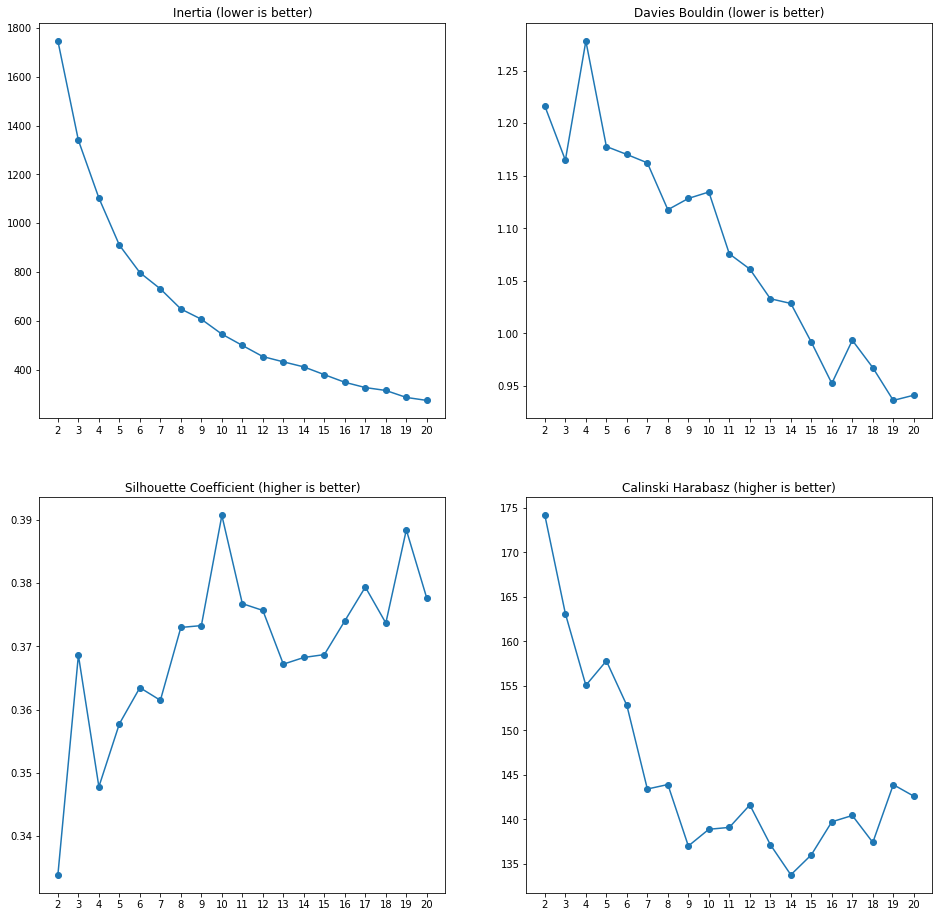

In [ ]:
metrics_pipeline(data=penguins, max_clusters=20, random_state=42)

# Gaussian Mixture

> A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.

## Pros and Cons

`-` not scalable

`+/-` many parameters to fit, e.g. `covariance_type`:

    covariance_type : {‘full’, ‘tied’, ‘diag’, ‘spherical’}, default=’full’
    String describing the type of covariance parameters to use. Must be one of:

    ‘full’: each component has its own general covariance matrix.

    ‘tied’: all components share the same general covariance matrix.

    ‘diag’: each component has its own diagonal covariance matrix.

    ‘spherical’: each component has its own single variance.

`-` still requires convex shapes

`+` does not require even shapes

In [ ]:
from sklearn.mixture import GaussianMixture

gm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("gmm", GaussianMixture(n_components=5, covariance_type="full"))
])

_ = gm_pipeline.fit(penguins)

In [ ]:
preds = gm_pipeline.predict(penguins)

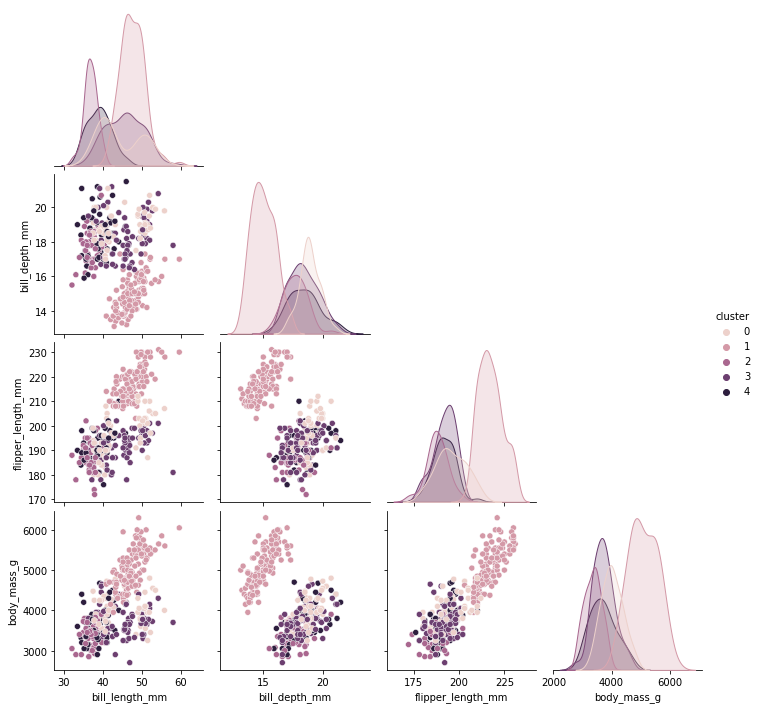

In [ ]:
_ = plot_clusters(preds=preds)

# DBSCAN

Basically works by defining *core samples* and *non-core samples*. Has two main hyperparameters: `min_samples` and `eps`, which are used to define the non-core samples.

> Higher `min_samples` or lower `eps` indicate higher density necessary to form a cluster.

## Pros and cons

`+` Non-flat geometry and uneven cluster sizes

> The DBSCAN algorithm views clusters as areas of high density separated by areas of low density. Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped.

`+` Works with large sample sizes and medium number of clusters

`+` Can be configured to perform outlier removal.

`-` Distance-based.

`-` Transductive: basically, it cannot be used to classify new data (kmeans is inductive).

> The DBSCAN algorithm is deterministic, always generating the same clusters when given the same data in the same order. However, the results can differ when data is provided in a different order.

`-` slow default implementation in sklearn. using `OPTICS` and passing the argument `extract_dbscan` is recommended.

In [ ]:
from sklearn.cluster import DBSCAN

db_pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("dbscan", DBSCAN(eps=.0000000003, min_samples=2))
    ]
)

db_results = db_pipeline.fit(penguins)

set(db_results[1].labels_)

{-1}

# Exercises

* Remove the dummy variables from `penguins` and fit the KMeans: what do you observe?
* Try different combinations of `covariance_type` for the GMM model

# Next time

* Plotting GMMs
* How to choose the number of components